In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import importlib
import os

In [2]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [3]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves")
from calculate_phase.atlas_SQL_query_df import get_orb_elements_id,atlas_SQL_query_orbid,atlas_SQL_query_orbid_expname
from calculate_phase import atlas_database_connection

In [4]:
# # select all available limiting_magnitude data
# # not available for all exposures for some reason
# qry = "select limiting_magnitude from atlas_exposures where limiting_magnitude is not null order by rand()"#" limit 1000000"
# cnx=atlas_database_connection.database_connection().connect()

In [5]:
# df_data=pd.read_sql_query(qry,cnx)
# df_data.to_csv("df_data_lim_mag.csv")

In [6]:
df_data = pd.read_csv("df_data_lim_mag.csv",index_col=0)

In [7]:
df_data

,limiting_magnitude
0,19.280000
1,18.910000
2,18.660000
3,19.050000
4,19.139999
...,...
943292,19.210000
943293,17.330000
943294,19.070000
943295,19.570000


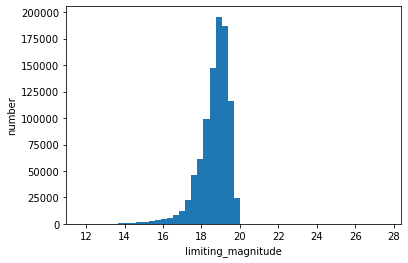

In [8]:
x_plot = "limiting_magnitude"
df_plot = df_data
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot[x_plot], bins = bins)#, log=True)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()

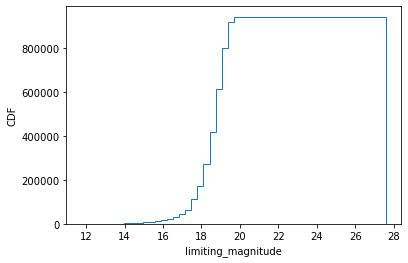

In [9]:
x_plot = "limiting_magnitude"
df_plot = df_data
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

x=ax1.hist(df_plot[x_plot], density=False, cumulative=True, histtype='step',bins=bins)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("CDF")

plt.show()

In [10]:
print(len(df_data))
print(len(df_data[df_data["limiting_magnitude"]<18]))

943297
148121


In [11]:
# get all atlas exposures from ken
df_atlas = pd.read_csv("atlas_co_exposures.tst", delim_whitespace = True)
df_atlas

,expname,object,ra,dec,mjd,filter,mag5sig,magzpt,qc,focus,...,camid,airmass,seeing,skymag,cloud,cloudrms,moonsky,nn,mangle,sourcefile
0,01a57800o0023o,SATGAL15,94.29499,-3.57453,57800.215184,o,17.46,21.374,2147483647,9472.0,...,acam2,1.213,6.880,18.40,1.008,0.069,21.0,57800,114.226,/atlas/red/01a/57800/01a57800o0023o.fits.fz
1,01a57800o0024o,SATGAL15,94.29482,-3.57469,57800.215718,o,17.55,21.363,2147483647,9472.0,...,acam2,1.211,6.786,18.43,1.005,0.071,21.0,57800,114.234,/atlas/red/01a/57800/01a57800o0024o.fits.fz
2,01a57800o0025o,SATGAL15,94.29479,-3.57474,57800.216255,o,17.62,21.366,2147483647,9472.0,...,acam2,1.209,6.882,18.47,1.006,0.066,21.0,57800,114.242,/atlas/red/01a/57800/01a57800o0025o.fits.fz
3,01a57800o0026o,SATGAL15,94.29468,-3.57478,57800.216777,o,17.74,21.386,2147483647,9472.0,...,acam2,1.207,6.719,18.54,1.005,0.064,21.0,57800,114.250,/atlas/red/01a/57800/01a57800o0026o.fits.fz
4,01a57800o0027o,SATGAL15,94.29472,-3.57477,57800.217284,o,17.76,21.397,2147483647,9472.0,...,acam2,1.205,7.167,18.67,1.007,0.054,21.0,57800,114.257,/atlas/red/01a/57800/01a57800o0027o.fits.fz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478166,01a59794o0394o,SX344S04,344.28863,-4.34018,59794.629209,o,18.23,22.179,4,7720.0,...,green+fuzzy+4x,1.415,5.011,18.51,1.000,0.011,21.0,59794,144.693,/atlas/red/01a/59794/01a59794o0394o.fits.fz
2478167,01a59794o0395o,SX339N01,339.07152,0.91148,59794.629665,o,18.05,22.170,4,7719.0,...,green+fuzzy+4x,1.469,5.105,18.34,1.006,0.024,21.0,59794,140.591,/atlas/red/01a/59794/01a59794o0395o.fits.fz
2478168,01a59794o0396o,SX344N01,344.28997,0.91039,59794.630119,o,18.09,22.183,4,7721.0,...,green+fuzzy+4x,1.359,4.967,18.29,1.000,0.013,21.0,59794,145.755,/atlas/red/01a/59794/01a59794o0396o.fits.fz
2478169,01a59794o0397o,SX350N01,349.50943,0.90926,59794.630574,o,18.07,22.190,4,7717.0,...,green+fuzzy+4x,1.273,4.967,18.24,1.000,0.015,21.0,59794,150.906,/atlas/red/01a/59794/01a59794o0397o.fits.fz


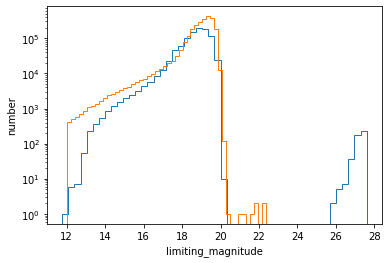

In [12]:
x_plot1 = "limiting_magnitude"
df_plot1 = df_data
x_plot2 = "mag5sig"
df_plot2 = df_atlas
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot1[x_plot1], bins = bins, histtype="step", log=True)
ax1.hist(df_plot2[x_plot2], bins = bins, histtype="step", log=True)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()

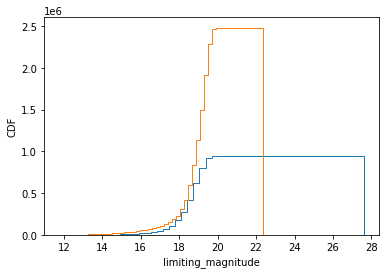

In [13]:
x_plot1 = "limiting_magnitude"
df_plot1 = df_data
x_plot2 = "mag5sig"
df_plot2 = df_atlas
bins = 50

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

x=ax1.hist(df_plot1[x_plot1], density=False, cumulative=True, histtype='step',bins=bins)
x=ax1.hist(df_plot2[x_plot2], density=False, cumulative=True, histtype='step',bins=bins)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("CDF")

plt.show()

In [14]:
# what's up with the really faint limiting magnitudes?

In [15]:
df_atlas[df_atlas["mag5sig"]>21]

,expname,object,ra,dec,mjd,filter,mag5sig,magzpt,qc,focus,...,camid,airmass,seeing,skymag,cloud,cloudrms,moonsky,nn,mangle,sourcefile
22872,01a57820o0225o,TA111S02,111.55405,-2.30081,57820.321402,o,22.38,25.328,2147483647,10042.0,...,acam2,1.115,0.000,19.89,1.0,0.0,19.168,57820,20.691,/atlas/red/01a/57820/01a57820o0225o.fits.fz
406604,02a58180o0383o,TA133N65,131.14806,65.19555,58180.389423,o,22.25,26.409,2147483647,10549.0,...,acam1,1.425,0.000,20.60,1.0,0.0,19.287,58180,72.187,/atlas/red/02a/58180/02a58180o0383o.fits.fz
406606,02a58180o0391o,TA124N54,122.51391,55.17682,58180.393086,o,21.16,25.402,2147483647,10545.0,...,acam1,1.284,0.000,19.51,1.0,0.0,19.368,58180,71.095,/atlas/red/02a/58180/02a58180o0391o.fits.fz
465341,02a58267o0194o,TA277N29,276.85342,29.53078,58267.530647,o,21.82,26.319,2147483647,10540.0,...,acam1,1.015,0.000,20.17,1.0,0.0,18.978,58267,56.066,/atlas/red/02a/58267/02a58267o0194o.fits.fz
465342,02a58267o0249o,TA282N29,282.55183,29.48973,58267.557695,o,21.86,26.156,2147483647,10540.0,...,acam1,1.022,0.000,20.20,1.0,0.0,19.060,58267,59.068,/atlas/red/02a/58267/02a58267o0249o.fits.fz
2130470,04a59631o0071o,SK059S11,59.21219,-10.55022,59631.037032,o,21.65,24.392,0,5229.0,...,gold+freckles+3x,1.261,4.631,23.05,1.0,0.0,21.000,59631,141.831,/atlas/red/04a/59631/04a59631o0071o.fits.fz


In [16]:
df_data[df_data["limiting_magnitude"]>21]

,limiting_magnitude
2317,27.469999
2561,26.120001
2806,27.420000
4557,26.680000
7156,26.860001
...,...
935993,26.750000
938687,27.219999
939166,27.500000
941771,27.040001


In [17]:
qry = "select expname,limiting_magnitude from atlas_exposures where limiting_magnitude>21"
cnx=atlas_database_connection.database_connection().connect()
df=pd.read_sql_query(qry,cnx)
df

,expname,limiting_magnitude
0,02a58003o0575o,27.190001
1,02a58003o0574o,27.250000
2,02a58003o0572o,27.200001
3,02a58003o0571o,27.160000
4,02a58003o0570o,27.200001
...,...,...
460,01a57820o0225o,22.380000
461,02a58180o0383o,22.250000
462,02a58180o0391o,21.160000
463,02a58267o0194o,21.820000


In [18]:
# mag_cut = 17
for mag_cut in [17,17.5,18.0]:
    df_cut = df_atlas[df_atlas["mag5sig"]<mag_cut]
    print(mag_cut,len(df_cut)/len(df_atlas))

17 0.03894000857890759
17.5 0.05659335049921898
18.0 0.08980534434468


In [ ]:
# seeing etc can also be a cause for bad photometry

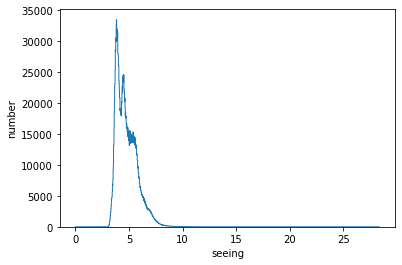

In [19]:
x_plot = "seeing"
df_plot = df_atlas
bins = "auto"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot[x_plot], bins = bins, histtype = "step")#, log=True)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()

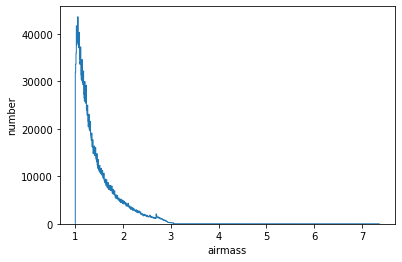

In [20]:
x_plot = "airmass"
df_plot = df_atlas
bins = "auto"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

ax1.hist(df_plot[x_plot], bins = bins, histtype = "step")#, log=True)

ax1.set_xlabel(x_plot)
ax1.set_ylabel("number")

plt.show()